# **A. Import**

In [11]:
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras.models import *
import glob
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **B. Model Inference**

In [12]:
# Load model
model= tf.keras.models.load_model('model_ann_sequential_improve.h5')

In [13]:
# Membuat dataframe
inf_file = glob.glob("C:/Users/Muhammad Hafidz Adit.DESKTOP-6IPGJGG/Documents/Hacktiv8/P2/GC7/Inference/*")

inf_df = pd.DataFrame({"images" : inf_file})
inf_df

,images
0,C:/Users/Muhammad Hafidz Adit.DESKTOP-6IPGJGG/...
1,C:/Users/Muhammad Hafidz Adit.DESKTOP-6IPGJGG/...
2,C:/Users/Muhammad Hafidz Adit.DESKTOP-6IPGJGG/...
3,C:/Users/Muhammad Hafidz Adit.DESKTOP-6IPGJGG/...
4,C:/Users/Muhammad Hafidz Adit.DESKTOP-6IPGJGG/...
5,C:/Users/Muhammad Hafidz Adit.DESKTOP-6IPGJGG/...
6,C:/Users/Muhammad Hafidz Adit.DESKTOP-6IPGJGG/...


In [14]:
# Melakukan image data generator
imgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
inf_gen = imgen.flow_from_dataframe(dataframe=inf_df,
                                    x_col="images",  # Assuming "images" is the column containing file paths
                                    y_col=None,  # Assuming there are no labels in the DataFrame
                                    target_size=(50, 50),
                                    class_mode=None,  # Since y_col is None, class_mode should be None
                                    shuffle=True,
                                    seed=2)

Found 7 validated image filenames.


In [15]:
#  Melakukan predik
prediction = model.predict(inf_gen)

prediction

1/1 [==============================] - 0s 254ms/step


array([[1.84148616e-12, 4.07843181e-08, 4.88344998e-12, 1.54225440e-15,
        1.20303547e-14, 4.37699659e-15, 4.59028085e-12, 6.52043766e-11,
        5.65836203e-14, 5.68149943e-16, 1.09386271e-10, 1.31918659e-13,
        9.85108398e-14, 8.51771588e-14, 3.66687324e-20, 8.99186947e-10,
        9.92265761e-01, 7.73400348e-03, 5.10928500e-09, 4.35580405e-10,
        4.46149367e-12, 2.77865919e-13, 1.35803064e-17, 7.60157725e-14,
        1.88464729e-14, 1.21997674e-08, 3.10695514e-14, 1.91238995e-12,
        1.18573538e-15, 8.25320369e-16, 4.25889033e-13, 5.76046535e-13,
        2.81113854e-10, 8.10621013e-16, 2.12496890e-13, 1.66296147e-07,
        1.69433109e-17],
       [2.01658534e-09, 9.73901428e-12, 7.01476446e-11, 3.95420834e-08,
        6.20945073e-08, 4.71582107e-10, 6.07876194e-09, 6.53944632e-09,
        6.65283210e-07, 8.59908478e-10, 9.99818742e-01, 3.04995342e-06,
        1.32393915e-10, 6.63473512e-11, 5.07987039e-08, 2.51776093e-08,
        5.11432952e-10, 6.92508828e-10,

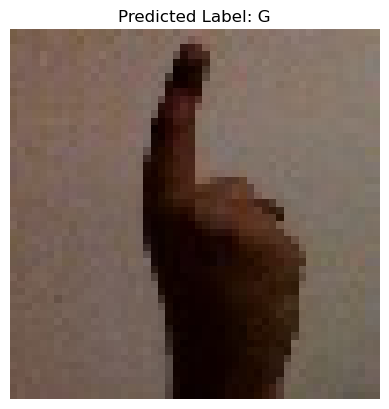

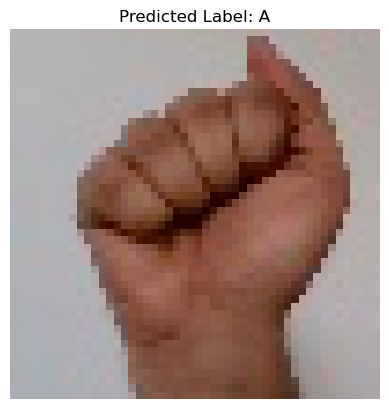

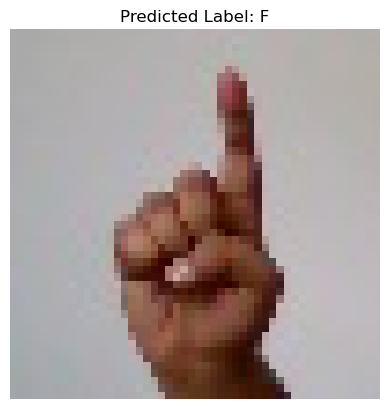

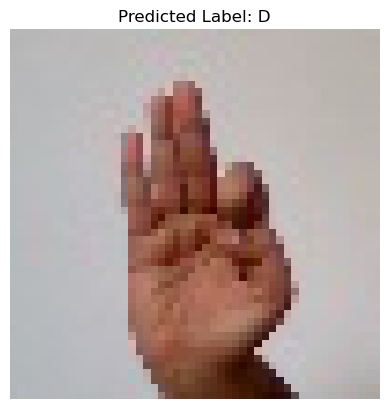

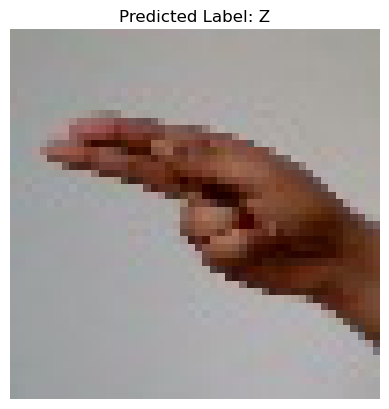

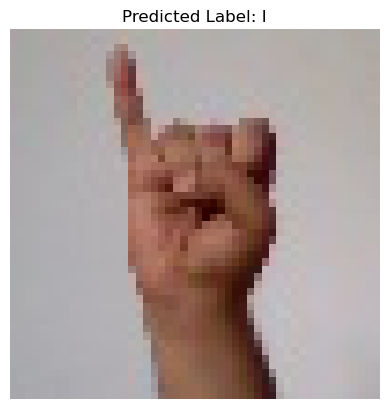

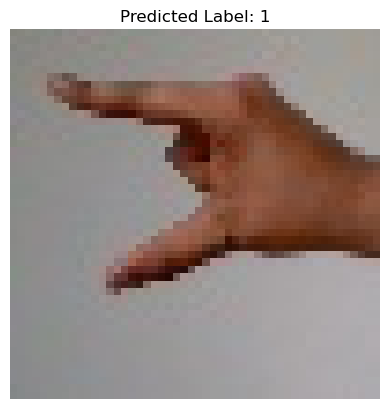

In [16]:
# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(prediction, axis=1)
# List label
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
          'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
          'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
          'U', 'V', 'W', 'X', 'Y', 'Z', '_']

# Display the images along with their predicted labels
for i in range(len(predicted_labels)):
    # Load the image
    img_path = inf_df.iloc[i]['images']
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(50, 50))

# Display the image
    plt.imshow(img)
    plt.axis('off')

# Get the predicted label
    predicted_label = labels[predicted_labels[i]]

# Display the predicted label
    plt.title(f'Predicted Label: {predicted_label}')

# Show the image with the predicted label
    plt.show()


Conclusion :
- In figure 1 it should mean the number 1
- In picture 2, the letter A is correctly interpreted
- In figure 3 it should mean the letter D
- In figure 4 it should mean the letter F
- In figure 5 it should mean the letter H
- In Figure 6, the letter I is correctly interpreted
- In figure 7 it should mean the letter Z